In [1]:
import warnings
warnings.filterwarnings('ignore')
import dynamo as dyn
import anndata
import pandas as pd
import numpy as np
import scipy.sparse
from anndata import AnnData
from scipy.sparse import csr_matrix
import preprocess_patched

In [2]:
rpe1 = dyn.sample_data.scEU_seq_rpe1()
dyn.convert2float(rpe1, ['Cell_cycle_possition', 'Cell_cycle_relativePos'])

rpe1_kinetics = rpe1[rpe1.obs.exp_type=='Pulse', :]
rpe1_kinetics.obs['time'] = rpe1_kinetics.obs['time'].astype(str)
rpe1_kinetics.obs.loc[rpe1_kinetics.obs['time'] == 'dmso', 'time'] = -1
rpe1_kinetics.obs['time'] = rpe1_kinetics.obs['time'].astype(float)
rpe1_kinetics = rpe1_kinetics[rpe1_kinetics.obs.time != -1, :]
rpe1_kinetics.layers['new'], rpe1_kinetics.layers['total'] = rpe1_kinetics.layers['ul'] + rpe1_kinetics.layers['sl'], rpe1_kinetics.layers['su'] + rpe1_kinetics.layers['sl'] + rpe1_kinetics.layers['uu'] + rpe1_kinetics.layers['ul']
del rpe1_kinetics.layers['uu'], rpe1_kinetics.layers['ul'], rpe1_kinetics.layers['su'], rpe1_kinetics.layers['sl']

|-----> Downloading scEU_seq data
|-----> Downloading data to ./data/rpe1.h5ad
|-----> File ./data/rpe1.h5ad already exists.


In [3]:
rpe1_genes = ['UNG', 'PCNA', 'PLK1', 'HPRT1']
rpe1_kinetics.obs.time  = rpe1_kinetics.obs.time.astype('float')
rpe1_kinetics.obs.time = rpe1_kinetics.obs.time/60 # convert minutes to hours

# Use a patched version of this dynamo method instead
# dyn.tl.recipe_kin_data(adata=rpe1_kinetics,
#                        keep_filtered_genes=True,
#                        keep_raw_layers=True,
#                        del_2nd_moments=False,
#                        tkey='time',
#                       )
preprocess_patched.recipe_kin_data(adata=rpe1_kinetics,
                       keep_filtered_genes=True,
                       keep_raw_layers=True,
                       del_2nd_moments=False,
                       tkey='time', 
                       kwargs = {}, pca_kwargs = {'n_pca_components' : 100}
                      )

|-----> keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: keep_filtered_cells_key=False
preprocessor.pca_kwargs = {'pca_key': 'X_pca'}
preprocessor.pca_kwargs = {'pca_key': 'X_pca', 'n_pca_components': 100}
|-----> Running monocle preprocessing pipeline...
|-----> convert ensemble name to official gene name
|-----? Your adata object uses non-official gene names as gene index. 
Dynamo is converting those names to official gene names.
|-----> Storing myGene name info into local cache db: mygene_cache.sqlite.


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
6 input query terms found dup hits:	[('ENSG00000175711', 2), ('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('E
78 input query terms found no hit:	['ENSG00000112096', 'ENSG00000116957', 'ENSG00000130723', 'ENSG00000148362', 'ENSG00000168078', 'ENS


|-----> Subsetting adata object and removing Nan columns from adata when converting gene names.
|-----------> filtered out 0 outlier cells
|-----------> filtered out 951 outlier genes
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> computing cell phase...
|-----> [Cell Phase Estimation] completed [8.2962s]
|-----> [Cell Cycle Scores Estimation] completed [0.2168s]
|-----> [Preprocessor-monocle] completed [4.1415s]
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] completed [13.9829s]
|-----? Your adata only has labeling data, but `NTR_vel` is set to be `False`. Dynamo will reset it to `True` to enable this analysis.
|-----> experiment type: kin, method: twostep, model: deterministic


Estimate gamma via linear regression of t vs. -ln(1-K): 1000it [00:00, 1132.87it/s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [7.3726s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via pearson kernel with sqrt transform.] completed [1.3907s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] 

AnnData object with n_obs × n_vars = 2793 × 11527
    obs: 'Plate_Id', 'Condition_Id', 'Well_Id', 'RFP_log10_corrected', 'GFP_log10_corrected', 'Cell_cycle_possition', 'Cell_cycle_relativePos', 'exp_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Gene_Id', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'feature_selection', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'cell_phase_order', 'cell_phase_genes', 'vel_params_names', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'cell_cycle_scores', 'X_umap', 'velocity_umap'
    varm: 'vel_params'
    layers: 'new', 'total', 'X_total', 'X_new', 'M_t', 'M_tt', 'M_n

In [4]:
print(rpe1_kinetics.obsm["X_pca"].shape)

(2793, 100)


|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [UMAP] completed [0.0011s]
|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via cosine kernel with sqrt transform.] completed [1.1126s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2951s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_RFP_GFP


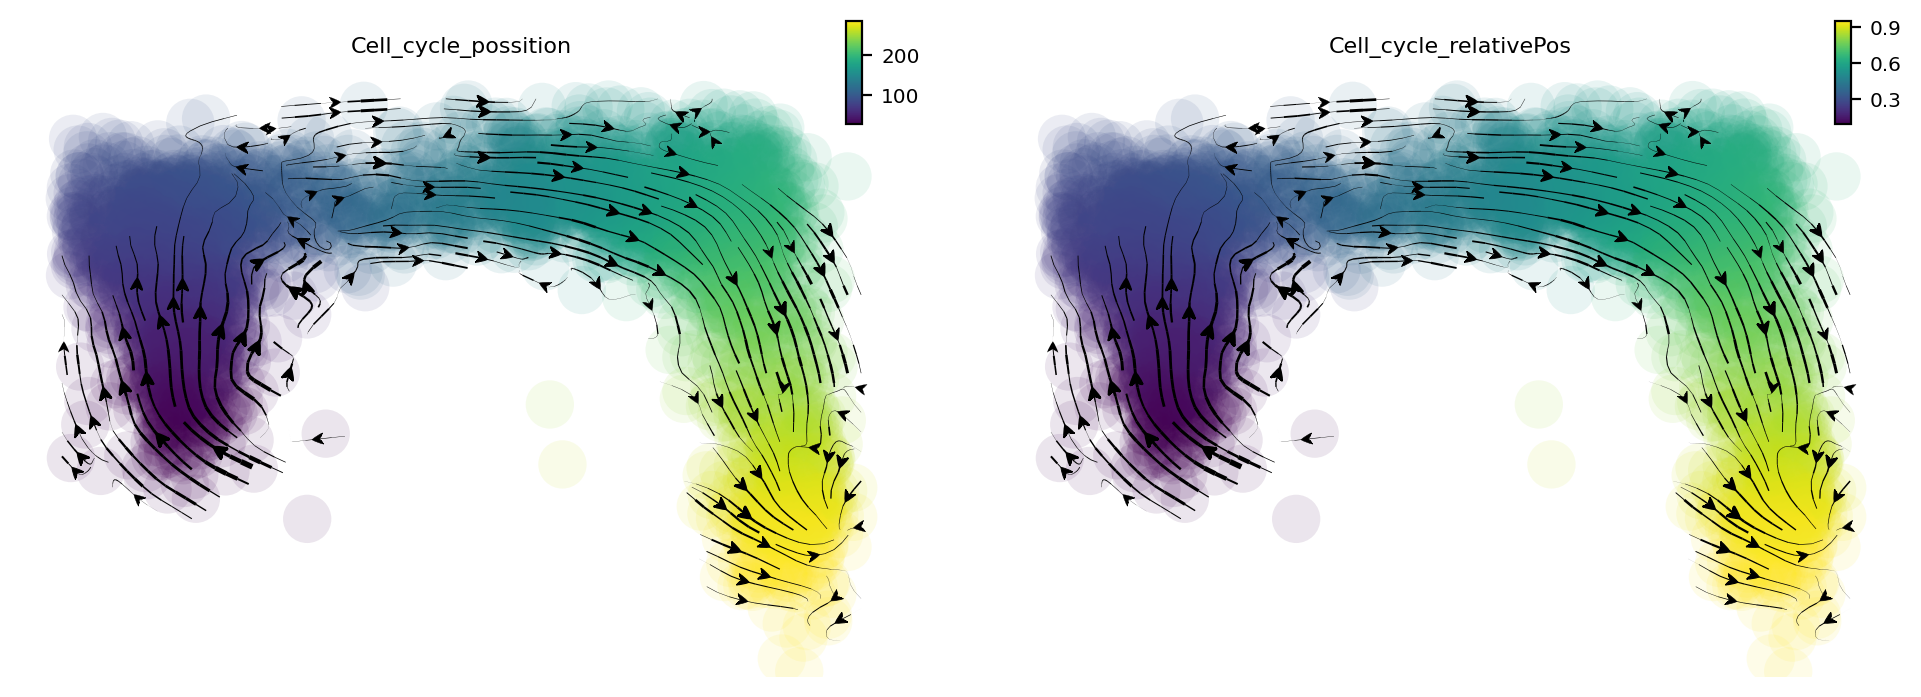

AnnData object with n_obs × n_vars = 2793 × 11527
    obs: 'Plate_Id', 'Condition_Id', 'Well_Id', 'RFP_log10_corrected', 'GFP_log10_corrected', 'Cell_cycle_possition', 'Cell_cycle_relativePos', 'exp_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Gene_Id', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'feature_selection', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'cell_phase_order', 'cell_phase_genes', 'vel_params_names', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'grid_velocity_RFP_GFP'
    obsm: 'X_pca', 'cell_cycle_scores', 'X_umap', 'velocity_umap', 'X_RFP_GFP', 'velocity_RFP_GFP'
    varm: 'vel_params'
    layer

In [5]:
def streamline(adata):
    dyn.tl.reduceDimension(adata, reduction_method='umap')
    dyn.tl.cell_velocities(adata, enforce=True, vkey='velocity_T', ekey='M_t', basis='RFP_GFP', method = "cosine")
    dyn.pl.streamline_plot(adata, color=['Cell_cycle_possition', 'Cell_cycle_relativePos'], basis='RFP_GFP')
    return adata
rpe1_kinetics.obsm['X_RFP_GFP'] = rpe1_kinetics.obs.loc[:, ['RFP_log10_corrected', 'GFP_log10_corrected']].values.astype('float')
streamline(rpe1_kinetics)

In [6]:
print(rpe1_kinetics.obsm["X_pca"].shape)

(2793, 100)


|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis pca. dimension reduction pca will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [PCA] completed [0.3991s]
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6700s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_pca
|-----------> skip filtering cell_cycle_phas

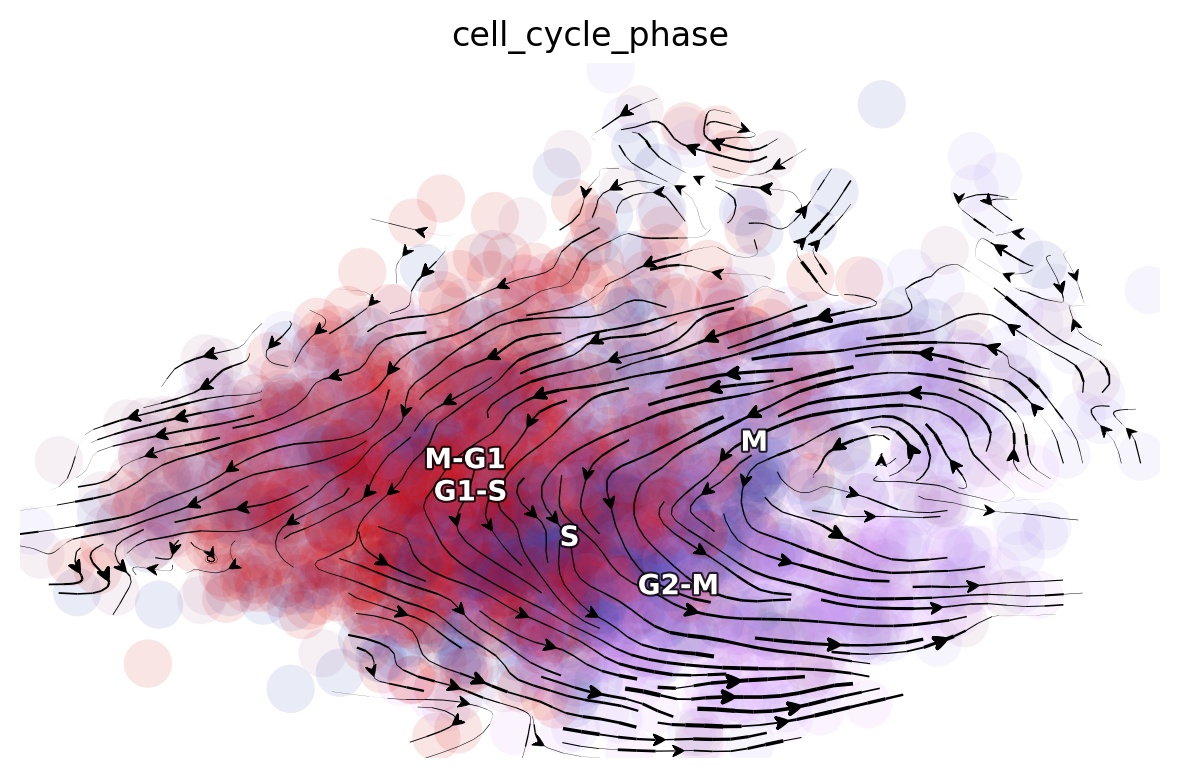

In [7]:
dyn.pl.streamline_plot(rpe1_kinetics, color=['cell_cycle_phase'], basis='pca')

In [8]:
dyn.tl.cell_velocities(
    rpe1_kinetics,
    enforce=True,
    vkey='velocity_T', ekey='M_t',
    method="cosine",
    neg_cells_trick = True,
    basis = "pca",
);

|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via cosine kernel with sqrt transform.] completed [1.1138s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6634s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


In [9]:
dyn.vf.VectorField(rpe1_kinetics, basis='RFP_GFP', M=50)
dyn.vf.VectorField(rpe1_kinetics, basis='pca', M=50)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: RFP_GFP. 
        Vector field will be learned in the RFP_GFP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [0.0796s]
|-----------> current cosine correlation between input velocities and learned velocities is less than 0.6. Make a 1-th vector field reconstruction trial.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [0.0791s]
|-----------> current cosine correlation between input velocities and learned velocities

In [10]:
rpe1_kinetics.write_h5ad("rpe1_kinetics.h5ad")

In [12]:
import torch
# data = {"x" : torch.tensor(rpe1_kinetics.obsm["X_RFP_GFP_SparseVFC"]).float(),
#         "v" : torch.tensor(rpe1_kinetics.obsm["velocity_RFP_GFP_SparseVFC"]).float()}
dim = 30
# dim = 100
data = {"x" : torch.tensor(rpe1_kinetics.obsm["X_pca_SparseVFC"][:, range(dim)]).float(),
        "v" : torch.tensor(rpe1_kinetics.obsm["velocity_pca_SparseVFC"][:, range(dim)]).float()}

In [13]:
import sklearn as sk
from sklearn import linear_model
_X = data['x']
_v = data['v']

# Fit linear field
lr = linear_model.RidgeCV()
lr.fit(_X, _v)
A, b = lr.coef_, lr.intercept_
mu = -torch.tensor(np.linalg.pinv(A.T @ A + 1e-3*np.eye(_X.shape[1])) @ A.T @ b, dtype = torch.float32)
A = torch.tensor(A, dtype = torch.float32)
_v_fit = (_X - mu.numpy()) @ A.T.numpy()

t = rpe1_kinetics.obs.Cell_cycle_relativePos
t_bin = np.digitize(t, np.histogram_bin_edges(t, 5)[:-1])-1

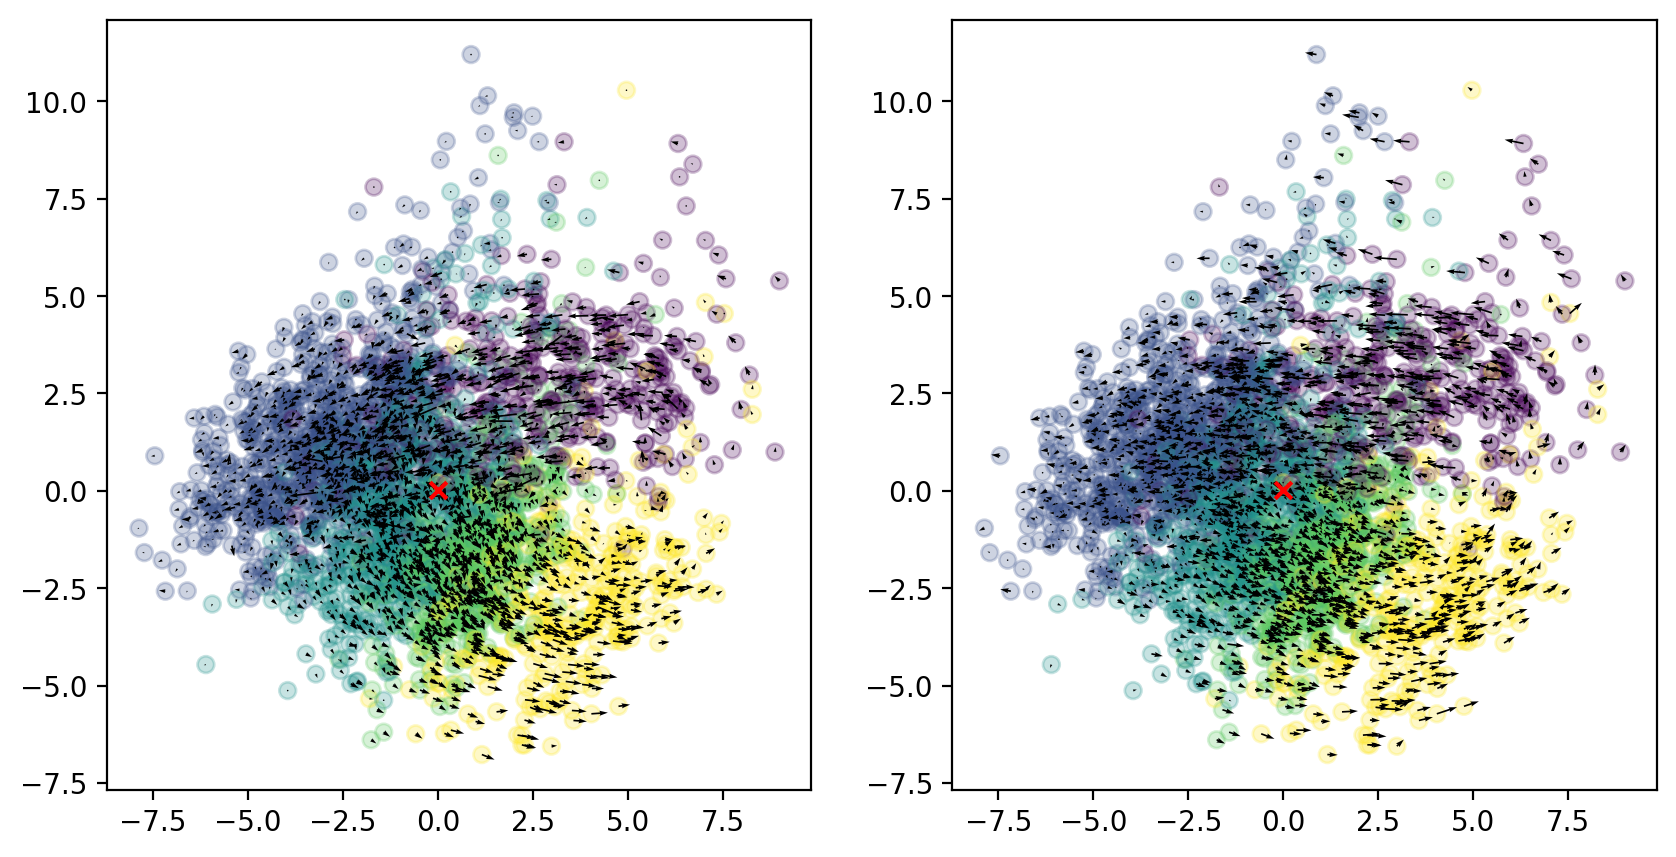

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(_X[:, 0], _X[:, 1], alpha = 0.25, c = t_bin)
plt.quiver(_X[:, 0], _X[:, 1], _v[:, 0], _v[:, 1],)
plt.scatter(mu[0:1], mu[1:2], marker = 'x', color = 'red')
plt.subplot(1, 2, 2)
plt.scatter(_X[:, 0], _X[:, 1], alpha = 0.25, c = t_bin)
plt.quiver(_X[:, 0], _X[:, 1], _v_fit[:, 0], _v_fit[:, 1])
plt.scatter(mu[0:1], mu[1:2], marker = 'x', color = 'red')
plt.show()

In [15]:
data['A'] = A
data['mu'] = mu
data['t_idx'] = t_bin
torch.save(data, f"data_cellcycle_pca_{dim}.pkl")